# Project Proposal

### Title: Given these 13 factors, does the patient have heart disease?

1. `Age` **Age (years)** 

2. `Sex` **Sex**: 0 = female; 1 = male

3. `Chest_Pain_Type` **Chest pain type**: 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4: = asymptomatic
    - Angina is the medical term for chest pain caused by disruption of blood flow and oxygen to the heart
    - Typical angina refers to classical symptoms of chest pain including pressure, heaviness, tightness in chest
    - Atypical angina refers to chest pain that doesn’t meet criteria for typical angina, where pain can be more localized and symptoms are less predictable than typical angina
    - Non-anginal pain refers to chest pain that is not caused by reduced blood flow to the heart 
    - Asymptomatic chest pain occurs when the heart doesn’t receive enough blood however there are no physical symptoms 
\
&nbsp;
4. `Resting_Blood_Pressure` **Resting blood pressure (mmHg)**
    - Resting blood pressure of patients is measured in millimeters of mercury (mmHg)
\
&nbsp;
5. `Cholesterol` **Cholesterol (mg/dL)**
    - Cholesterol of patient measured in milligram per decilitre (mg/dL)
\
&nbsp;
6. `Fasting_Blood_Sugar` **Fasting blood sugar (> 120 mg/dL)**: 0 = false; 1 = true
    - False if fasting blood sugar is below or equal to 120 mg/dL
    - True if patients fasting blood sugar is above 120 mg/dL
    - Fasting blood sugar refers to the level of glucose in the blood after the patient has not eaten anything for a period of time
\
&nbsp;
7. `Resting_ECG` **Resting electrocardiographic measurement (ECG)**: 0 = normal resting ECG; 1 = abnormal resting ECG; 2 = possible left ventricular hypertrophy
    - Resting ECG test measures your resting heart’s rhythm and electrical signals each time it beats 
    - Normal resting ECG is the normal electrical activity or pattern of the heart that shows no significant abnormalities
    - Abnormal resting ECG will represent ST-T abnormality on ECG. This occurs when there are abnormalities in your normal ST-T waves that help your heart beat properly.
        - ST-T waves represents the period when your heart ventricles are preparing to contract again for the next heartbeat
    - Possible left ventricular hypertrophy (LVH) is based on Estes’ criteria, which is a set of guidelines used to interpret ECG results. LVH is a condition where the left walls of the heart become thickened and enlarged.
\
&nbsp;
8. `Max_Heart_Rate` **Maximum heart rate (bpm)**
    - Measured in beats per minute (bpm)
\
&nbsp;
9. `Exercise_Induced_Angina` **Exercise induced angina**: 0 = no; 1 = yes
    - Exercise induced angina is chest pain that occurs during physical exertion or stress 
\
&nbsp;
10. `ST_Depression` **ST depression induced by exercise relative to rest**
    - ST depression is a pattern seen on ECG that indicates decreased blood flow to heart muscle 
\
&nbsp;
11. `Slope` **Slope of the peak exercise ST segment**: 1 = upsloping; 2 = flat; 3 = downsloping
    - Slope of the peak exercise ST segment refers to the change in the ST segment collected from the ECG during exercise 
    - Slope is evaluated from rest and then the change in ST segment when the patient is exercising at maximum capacity is recorded
\
&nbsp;
12. `Number_of_Major_Vessels` **Number of major vessels**
    - Major blood vessels carry blood to and from heart 
    - Ranges from 0-3, colored by fluoroscopy to determine number of major vessels
\
&nbsp;
13. `Thal` **Thalassemia**: 3 = normal; 6 = fixed defect; 7 = reversible defect
    - Thalassemia is a genetic blood disorder that results in reduced hemoglobin in red blood cells. This causes red blood cells to carry less oxygen to the heart and throughout the body
    - Fixed defect refers to no blood flow in an area of heart muscle
    - Reversible defect refers to reduced blood flow in an area of heart muscle
\
&nbsp;
14. `Heart_Disease_Diagnosis` **Heart disease diagnosis**: 0 = < 50% diameter narrowing; 1 = > 50% diameter narrowing
    - Heart disease diagnosis is based on angiographic disease status that uses an angiogram to visualize blood vessels in the heart
    - Angiographic disease status measures the degree of narrowing in coronary arteries, where a diameter narrowing of less than 50% is considered mild or insignificant, and higher is considered significant and may require treatment.


https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/types-of-heart-disease


### Introduction:

Heart disease encompasses a group of conditions that can impair the structure or function of the heart. There are risk factors that increase heart disease that cannot be controlled such as sex, age, and genetics. The Heart Disease dataset from the UCI Machine Learning Repository examines the relationship between  13 factors and their effect on heart disease. The objective of our project is to examine some of these potential factors to identify patterns and make predictions that answer our research question: Given these 13 factors, does the patient have heart disease? 

### Preliminary exploratory data analysis:

In [135]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 15)
library(RColorBrewer)
library(cowplot)

In [ ]:
cleveland <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleveland) = c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_Blood_Sugar",
                        "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "ST_Depression", "Slope",
                         "Number_of_Major_Vessels", "Thal", "Heart_Disease_Diagnosis")
cleveland <- cleveland |>
    mutate(Number_of_Major_Vessels = as.numeric(Number_of_Major_Vessels)) |>
    mutate(Thal = as.numeric(Thal))       

calc_mode <- function(x){
  
  # List the distinct / unique values
  distinct_values <- unique(x)
  
  # Count the occurrence of each distinct value
  distinct_tabulate <- tabulate(match(x, distinct_values))
  
  # Return the value with the highest occurrence
  distinct_values[which.max(distinct_tabulate)]
}

cleveland <- cleveland |>
  mutate(across(everything(), ~replace_na(.x, calc_mode(.x))))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [ ]:
cleveland <- cleveland  |>
    mutate(
        Heart_Disease_Diagnosis = case_when(
                Heart_Disease_Diagnosis != 0 ~ 1,
                Heart_Disease_Diagnosis == 0 ~ 0
            )
        )
cleveland <- cleveland  |>
    mutate(
        Heart_Disease_Diagnosis = as.factor(Heart_Disease_Diagnosis)
        )    
head(cleveland)
tail(cleveland)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,0,3,0


In [ ]:
set.seed(1)
data_split <- initial_split(cleveland, prop = 0.75, strata = Heart_Disease_Diagnosis)
training_data <- training(data_split)
testing_data <- testing(data_split)
head(training_data)
tail(training_data)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
57,1,3,150,168,0,0,174,0,1.6,1,0,3,0


Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,1,3,152,212,0,2,150,0,0.8,2,0,7,1
63,1,4,140,187,0,2,144,1,4.0,1,2,7,1
59,1,4,164,176,1,2,90,0,1.0,2,2,6,1
57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [223]:
##MEAN TABLE FOR NUMERICAL VARIABLES##

mean_table1 <- training_data |>
    filter(Heart_Disease_Diagnosis == 1) |>
    select(Age, Resting_Blood_Pressure, Cholesterol, Max_Heart_Rate, ST_Depression) |>
    colMeans(na.rm = TRUE) 

mean_table1.matrix = matrix(data = mean_table1, nrow = 1, byrow = TRUE)
mean_table1.df = as.data.frame(mean_table1.matrix)
colnames(mean_table1.df) = c("Age", "Resting_Blood_Pressure", "Cholesterol", "Max_Heart_Rate", "ST_Depression")

mean_table1 = mean_table1.df 

mean_table1 <- mean_table1 |>
    pivot_longer(cols = Age:ST_Depression, names_to = "Variable", values_to = "Mean for Heart Disease Patients") 

mean_table2 <- training_data |>
    filter(Heart_Disease_Diagnosis == 0) |>
     select(Age, Resting_Blood_Pressure, Cholesterol, Max_Heart_Rate, ST_Depression) |>
    colMeans(na.rm = TRUE)

mean_table2.matrix = matrix(data = mean_table2, nrow = 1, byrow = TRUE)
mean_table2.df = as.data.frame(mean_table2.matrix)
colnames(mean_table2.df) = c("Age", "Resting_Blood_Pressure", "Cholesterol", "Max_Heart_Rate", "ST_Depression")
mean_table2 = mean_table2.df 

mean_table2 <- mean_table2 |>
    pivot_longer(cols = Age:ST_Depression, names_to = "Variable2", values_to = "Mean for Healthy Patients")

mean_table <- bind_cols(mean_table1, mean_table2) |>
    select(1, 2, 4) |>
    mutate("Heart Disease Mean : Healthy Patients Mean" = `Mean for Heart Disease Patients`/
           `Mean for Healthy Patients`)

mean_table

##MODE TABLE FOR DISCRETE VARIABLES##

mode_table1 <- training_data |>
    filter(Heart_Disease_Diagnosis == 1) |>
    select(Sex, Chest_Pain_Type, Fasting_Blood_Sugar, Resting_ECG, Exercise_Induced_Angina, Slope, Number_of_Major_Vessels, Thal) |>
    map_df(calc_mode) 

mode_table1.matrix = matrix(data = mode_table1, nrow = 1, byrow = TRUE)
mode_table1.df = as.data.frame(mode_table1.matrix)
colnames(mode_table1.df) = c("Sex", "Chest_Pain_Type", "Fasting_Blood_Sugar", "Resting_ECG", "Exercise_Induced_Angina", "Slope", "Number_of_Major_Vessels", "Thal")

mode_table1 = mode_table1.df 

mode_table1 <- mode_table1 |>
    pivot_longer(cols = Sex:Thal, names_to = "Variable", values_to = "Heart Disease Mode") 

mode_table2 <- training_data |>
    filter(Heart_Disease_Diagnosis == 0) |>
     select(Sex, Chest_Pain_Type, Fasting_Blood_Sugar, Resting_ECG, Exercise_Induced_Angina, Slope, Number_of_Major_Vessels, Thal) |>
    map_df(calc_mode)

mode_table2.matrix = matrix(data = mode_table2, nrow = 1, byrow = TRUE)
mode_table2.df = as.data.frame(mode_table2.matrix)
colnames(mode_table2.df) = c("Sex", "Chest_Pain_Type", "Fasting_Blood_Sugar", "Resting_ECG", "Exercise_Induced_Angina", "Slope", "Number_of_Major_Vessels", "Thal")
mode_table2 = mode_table2.df 

mode_table2 <- mode_table2 |>
    pivot_longer(cols = Sex:Thal, names_to = "Variable2", values_to = "Healthy Patients Mode")

mode_table <- bind_cols(mode_table1, mode_table2) |>
    select(1, 2, 4)

mode_table

Variable,Mean for Heart Disease Patients,Mean for Healthy Patients,Heart Disease Mean : Healthy Patients Mean
<chr>,<dbl>,<dbl>,<dbl>
Age,57.230769,52.9674797,1.0804888
Resting_Blood_Pressure,135.509615,130.4552846,1.0387438
Cholesterol,250.567308,243.9105691,1.0272917
Max_Heart_Rate,138.230769,158.6747967,0.8711577
ST_Depression,1.544231,0.6170732,2.5025084


Variable,Heart Disease Mode,Healthy Patients Mode
<chr>,<list>,<list>
Sex,1,1
Chest_Pain_Type,4,3
Fasting_Blood_Sugar,0,0
Resting_ECG,2,0
Exercise_Induced_Angina,1,0
Slope,2,1
Number_of_Major_Vessels,1,0
Thal,7,3


In [ ]:
proportions <- training_data |>
               group_by(Heart_Disease_Diagnosis) |>
               summarize(count = n())

proportions

Heart_Disease_Diagnosis,count
<fct>,<int>
0,123
1,104


## Variable Selection

#### Continuous Variables:

`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Resting_Blood_Pressure'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Resting_Blood_Pressure'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Cholesterol'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Cholesterol'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Max_Heart_Rate'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Max_Heart_Rate'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'ST_Depression'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ST_Depression'. You can override using the
`.groups` argument.


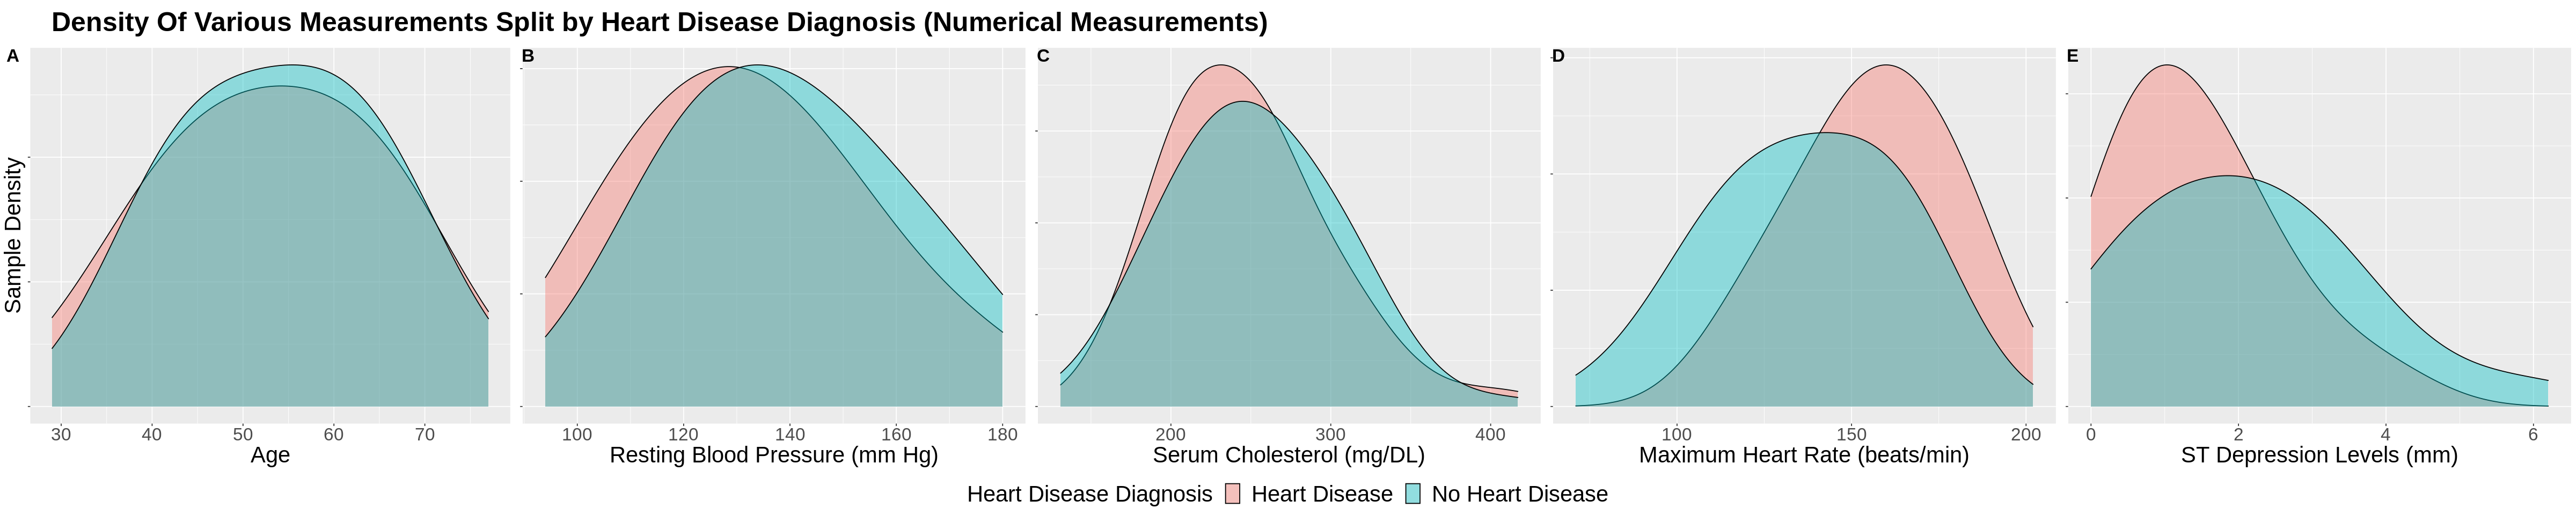

In [227]:
options(repr.plot.width=40, repr.plot.height=8)

##CONTINOUS VARIABLES##

##AGE##

heart_age_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Age, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_age_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Age, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_age_combined <- rbind(heart_age_table0, heart_age_table1)
#heart_age_combined

heart_age_plot <- ggplot(heart_age_combined, aes(x = Age, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Age", y = "Sample Density", fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                # ggtitle("Density of People With and \nWithout Heart Disease Vs Age") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank()) 
                 
##RBP##

heart_bp_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Resting_Blood_Pressure, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_bp_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Resting_Blood_Pressure, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_bp_combined <- rbind(heart_bp_table0, heart_bp_table1)
#heart_bp_combined

heart_bp_plot <- ggplot(heart_bp_combined, aes(x = Resting_Blood_Pressure, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Resting Blood Pressure (mm Hg)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                # ggtitle("Density of People With and \nWithout Heart Disease Vs \nResting Blood Pressure") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())

##CHOLESTEROL##

heart_chol_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Cholesterol, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_chol_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Cholesterol, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_chol_combined <- rbind(heart_chol_table0, heart_chol_table1)

heart_chol_plot <- ggplot(heart_chol_combined, aes(x = Cholesterol, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Serum Cholesterol (mg/DL)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                # ggtitle("Density of People With and \nWithout Heart Disease Vs \nSerum Cholesterol") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())

##MAX HEART RATE##

heart_hr_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Max_Heart_Rate, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_hr_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Max_Heart_Rate, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_hr_combined <- rbind(heart_hr_table0, heart_hr_table1)

heart_hr_plot <- ggplot(heart_hr_combined, aes(x = Max_Heart_Rate, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Maximum Heart Rate (beats/min)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                 #ggtitle("Density of People With and \nWithout Heart Disease Vs \nMaximum Heart Rate") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())

##DEPRESSION#

heart_st_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(ST_Depression, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_st_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(ST_Depression, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_st_combined <- rbind(heart_st_table0, heart_st_table1)

heart_st_plot <- ggplot(heart_st_combined, aes(x = ST_Depression, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "ST Depression Levels (mm)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                 #ggtitle("Density of People With and \nWithout Heart Disease Vs \nMaximum Heart Rate") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())


###
title <- ggdraw() +
         draw_label('Density Of Various Measurements Split by Heart Disease Diagnosis (Numerical Measurements)',
                   fontface = 'bold',
                   x = 0.02,
                   hjust = 0,
                   size = 30) 

             
cont_grid <- plot_grid(heart_age_plot, heart_bp_plot, heart_chol_plot, heart_hr_plot, heart_st_plot, 
                       ncol = 5, labels = c('A', 'B', 'C', 'D', 'E'), label_size = 20) 

legend_bottom <- get_legend(heart_age_plot + guides(color = guide_legend(now=1)) +
                            theme(legend.position = 'bottom', legend.text = element_text(size = 25), legend.title = element_text(size = 25)))

plot_grid(title, cont_grid, legend_bottom, ncol = 1, rel_heights = c(0.1, 1))

### Continuous Variable Selection (Density Figure 1 A-E Above):

We will be selecting our numerical variables based on the visualizations and table above.  We will be looking at our density plots to see which variables show minimal overlap between the heart disease/healthy conditions, as more overlap indicates that the variable in question does not play a major role in distinguishing healthy patients from heart disease patients. To reinforce our choices for numerical variables through quantification, we will be comparing the ratio of means (disease:healthy). Ratios that notably differ from 1 (we have chosen that the ratios must be larger than 1.10 or less than 0.90) indicate that the variable in question plays a large role in distinguishing diseased patients from healthy patients. Our choices for the continuous variables are below:

**Chosen numerical variables:**
 - Maximum Heart Rate
 - ST Depression Levels
 
**Omitted numerical variables:**
 - Age
 - Resting Blood Pressure
 - Serum Cholesterol

**Reasoning:**

The density plots showed relatively low overlap of each of the variables (between the heart disease and no heart disease subsets) for Maximum Heart Rate and ST Depression Levels, but relatively higher overlap for the other numerical variables. These choices are reinforced by the mean table we created, which shows that the disease:healthy was less than 1.10 (for Age, Resting Blood Pressure, and Serum Cholesterol). This high overlap in the density plots and low disease:healthy ratio indicates that these variables don’t play a major role in distinguishing diseased patients from healthy patients.


#### Discrete Variabes:

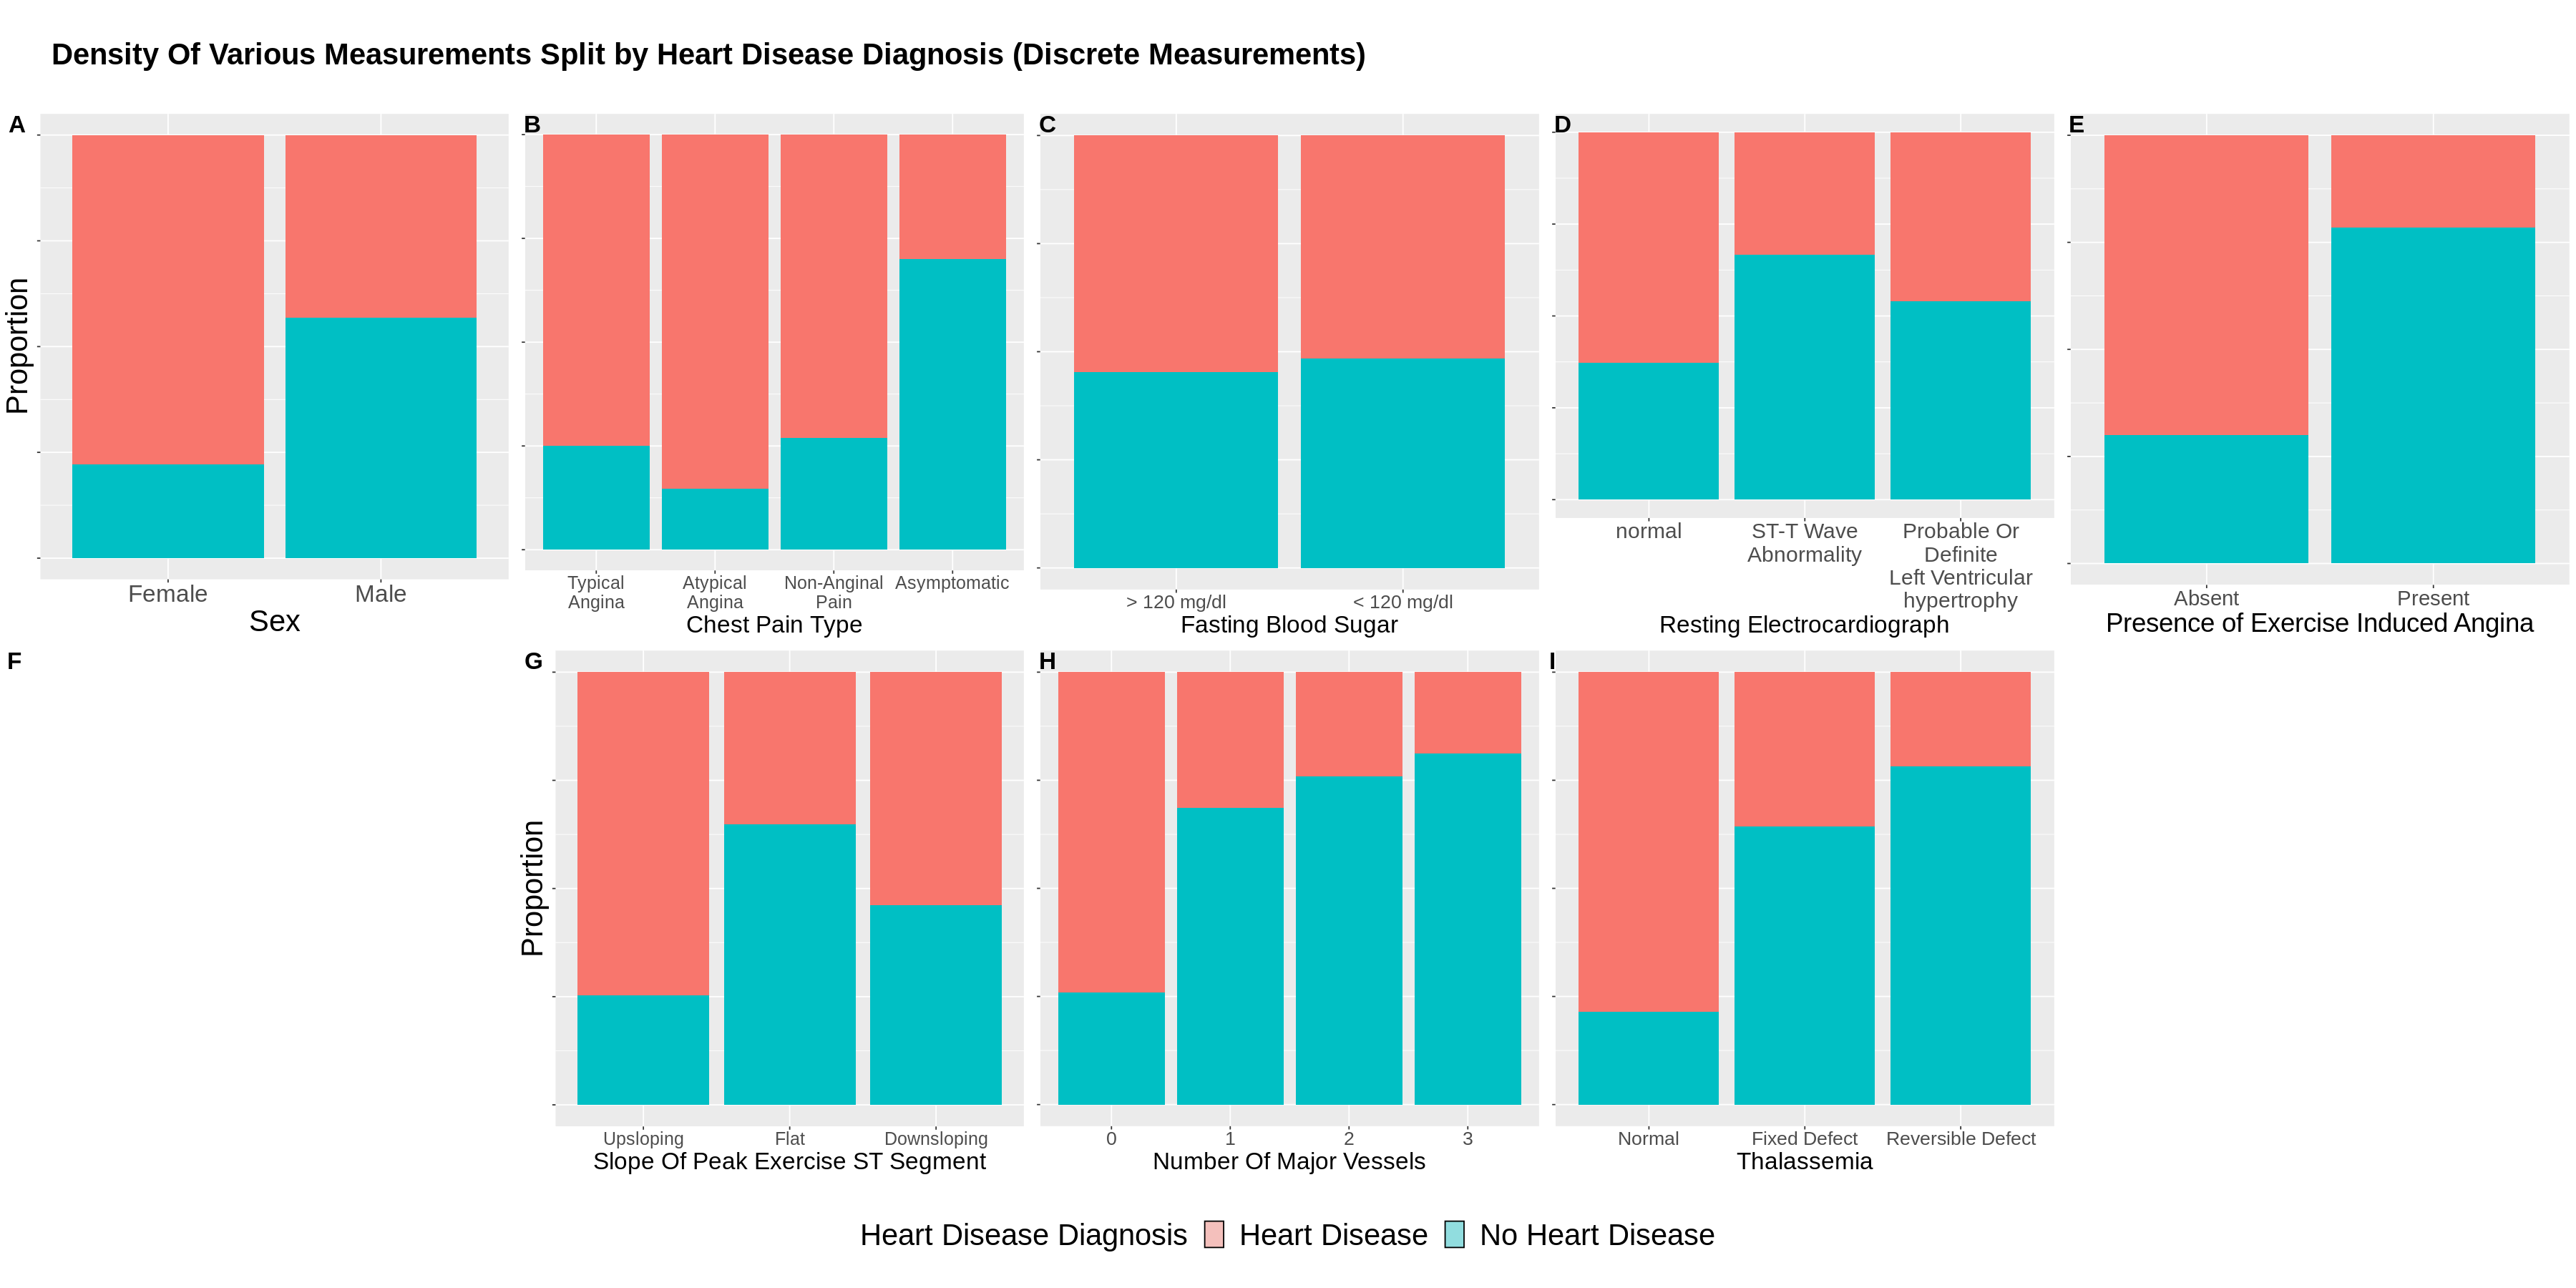

In [231]:
##DISCRETE VARIABLES##
options(repr.plot.width=30, repr.plot.height=15)

sex_plot <- training_data |>
   ggplot(aes(x = as.factor(Sex), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Sex", y = "Proportion", fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('Female', 'Male')) +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())

cp_type_plot <- training_data |>
   ggplot(aes(x = as.factor(Chest_Pain_Type), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Chest Pain Type", 
        y = NULL, fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('Typical\nAngina', 'Atypical\nAngina', 'Non-Anginal\nPain', 'Asymptomatic')) +
                 theme(axis.title.x = element_text(size = 20), axis.text.x = element_text(size = 15), legend.position = 'none', axis.text.y = element_blank())

fbs_plot <- training_data |>
   ggplot(aes(x = as.factor(Fasting_Blood_Sugar), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Fasting Blood Sugar", 
        y = NULL, fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('> 120 mg/dl', '< 120 mg/dl')) +
                 theme(text = element_text(size = 20), legend.position = 'none', axis.text.y = element_blank())

restecg_plot <- training_data |>
   ggplot(aes(x = as.factor(Resting_ECG), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Resting Electrocardiograph",
        y = NULL, fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('normal', 'ST-T Wave\nAbnormality', 'Probable Or\nDefinite\nLeft Ventricular\nhypertrophy')) +
                 theme(axis.text.x = element_text(size = 18), axis.title.x = element_text(size = 20), legend.position = 'none', axis.text.y = element_blank())

bar_plot9 <- training_data |>
   ggplot(aes(x = as_factor(Exercise_Induced_Angina), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Presence of Exercise Induced Angina") +
   ylab(NULL) +
   labs(fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('Absent', 'Present')) +
                 theme(text = element_text(size = 22), legend.position = 'none', axis.text.y = element_blank())

bar_plot11 <- training_data |>
   ggplot(aes(x = as_factor(Slope), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Slope Of Peak Exercise ST Segment") +
   ylab('Proportion') +
   labs(fill = "Heart Disease Diagnosis") +
                 scale_x_discrete(labels = c('Upsloping', 'Flat', 'Downsloping')) +
                 theme(axis.title.x = element_text(size = 20), axis.title.y = element_text(size = 25), axis.text.x = element_text(size = 15),
                       legend.position = 'none', axis.text.y = element_blank())

bar_plot12 <- training_data |>
   filter(!is.na(Number_of_Major_Vessels)) |>
   ggplot(aes(x = as_factor(Number_of_Major_Vessels), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Number Of Major Vessels") +
   ylab(NULL) +
   labs(fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 20), legend.position = 'none', axis.text.y = element_blank())

bar_plot13 <- training_data |>
   filter(!is.na(Thal)) |>
   ggplot(aes(x = as_factor(Thal), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Thalassemia") +
   ylab(NULL) +
                 scale_x_discrete(labels = c('Normal', 'Fixed Defect', 'Reversible Defect')) +
   labs(fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 20), legend.position = 'none', axis.text.y = element_blank())

cont_grid1 <- plot_grid(sex_plot, cp_type_plot, fbs_plot, restecg_plot, bar_plot9, NULL, bar_plot11, bar_plot12, bar_plot13, NULL,
                       labels = c('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'), label_size = 20,  
                       ncol = 5) 
title1 <- ggdraw() +
         draw_label('Density Of Various Measurements Split by Heart Disease Diagnosis (Discrete Measurements)',
                   fontface = 'bold',
                   x = 0.02,
                   hjust = 0,
                   size = 25) 
plot_grid(title1, cont_grid1, legend_bottom, ncol = 1, rel_heights = c(0.1, 1))

## Discrete Variable Selection (Figre 2 A-I Above)

We will be selecting our discrete variables based on a different criteria compared to the numerical ones - we will be looking at the proportion of diseased and healthy patients in each level of the discrete variable. If any of the variable’s levels have proportions that notably differ from a 50/50 proportion, then we will use it (e.g. If a variable has 4 levels, and 3 of them are 50/50, but the 4th one is 90/10, then we will use that variable as a predictor variable). This is because that variable can play a major role in distinguishing diseased patients from healthy patients. This is because if the particular category has the level of the discrete variable that differs from the 50/50 proportion, then this variable can play a major role in classification. (e.g. continuing on the variable from the previous example, if an observation has the 4th level for that variable, then that variable can help distinguish diseased/healthy patients). Our choices for the continuous variables are below:

**Chosen discrete variables:**
    
 - Sex
 - Chest Pain Type
 - Resting Electrocardiograph
 - Presence of Exercise Induced Angina
 - Slope of Peak Exercise ST Segment
 - Number of Major Vessels Colored By Fluoroscopy
 - Thalassemia
 
**Omitted discrete variables:**

 - Fasting Blood Sugar
 
These choices follow the same logic as mentioned above. Fasting blood sugar was the only discrete variable that had all of its levels close to a 50/50 proportion between diseased and healthy patients. 


## Knn Classifier Build 

#### 5-fold Cross-Validation

In [ ]:
vFold <- vfold_cv(training_data, v = 5, strata = Heart_Disease_Diagnosis)

spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
      set_mode("classification")

myRecipe <- recipe(Heart_Disease_Diagnosis ~ Max_Heart_Rate + ST_Depression + Sex + Chest_Pain_Type + Resting_ECG + Exercise_Induced_Angina + Slope + Number_of_Major_Vessels + Thal, data = training_data) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

kValues  <- tibble(neighbors = seq(from = 1, to = 150, by = 5))
                   
results <- workflow() |>
    add_recipe(myRecipe) |>
      add_model(spec) |>
      tune_grid(resamples = vFold, grid = kValues) |>
      collect_metrics() |>
     filter(.metric == "accuracy")

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7710760,5,0.04377273,Preprocessor1_Model01
6,accuracy,binary,0.7883663,5,0.02485127,Preprocessor1_Model02
11,accuracy,binary,0.8410277,5,0.01698612,Preprocessor1_Model03
16,accuracy,binary,0.8411243,5,0.01667795,Preprocessor1_Model04
21,accuracy,binary,0.8501186,5,0.01314572,Preprocessor1_Model05
26,accuracy,binary,0.8501186,5,0.02136268,Preprocessor1_Model06


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
121,accuracy,binary,0.8147475,5,0.02585871,Preprocessor1_Model25
126,accuracy,binary,0.8103030,5,0.02863501,Preprocessor1_Model26
131,accuracy,binary,0.8103996,5,0.02282868,Preprocessor1_Model27
136,accuracy,binary,0.8104963,5,0.01913712,Preprocessor1_Model28
141,accuracy,binary,0.8106939,5,0.01998124,Preprocessor1_Model29
146,accuracy,binary,0.8019982,5,0.01479534,Preprocessor1_Model30


0.85901185770751 
              56

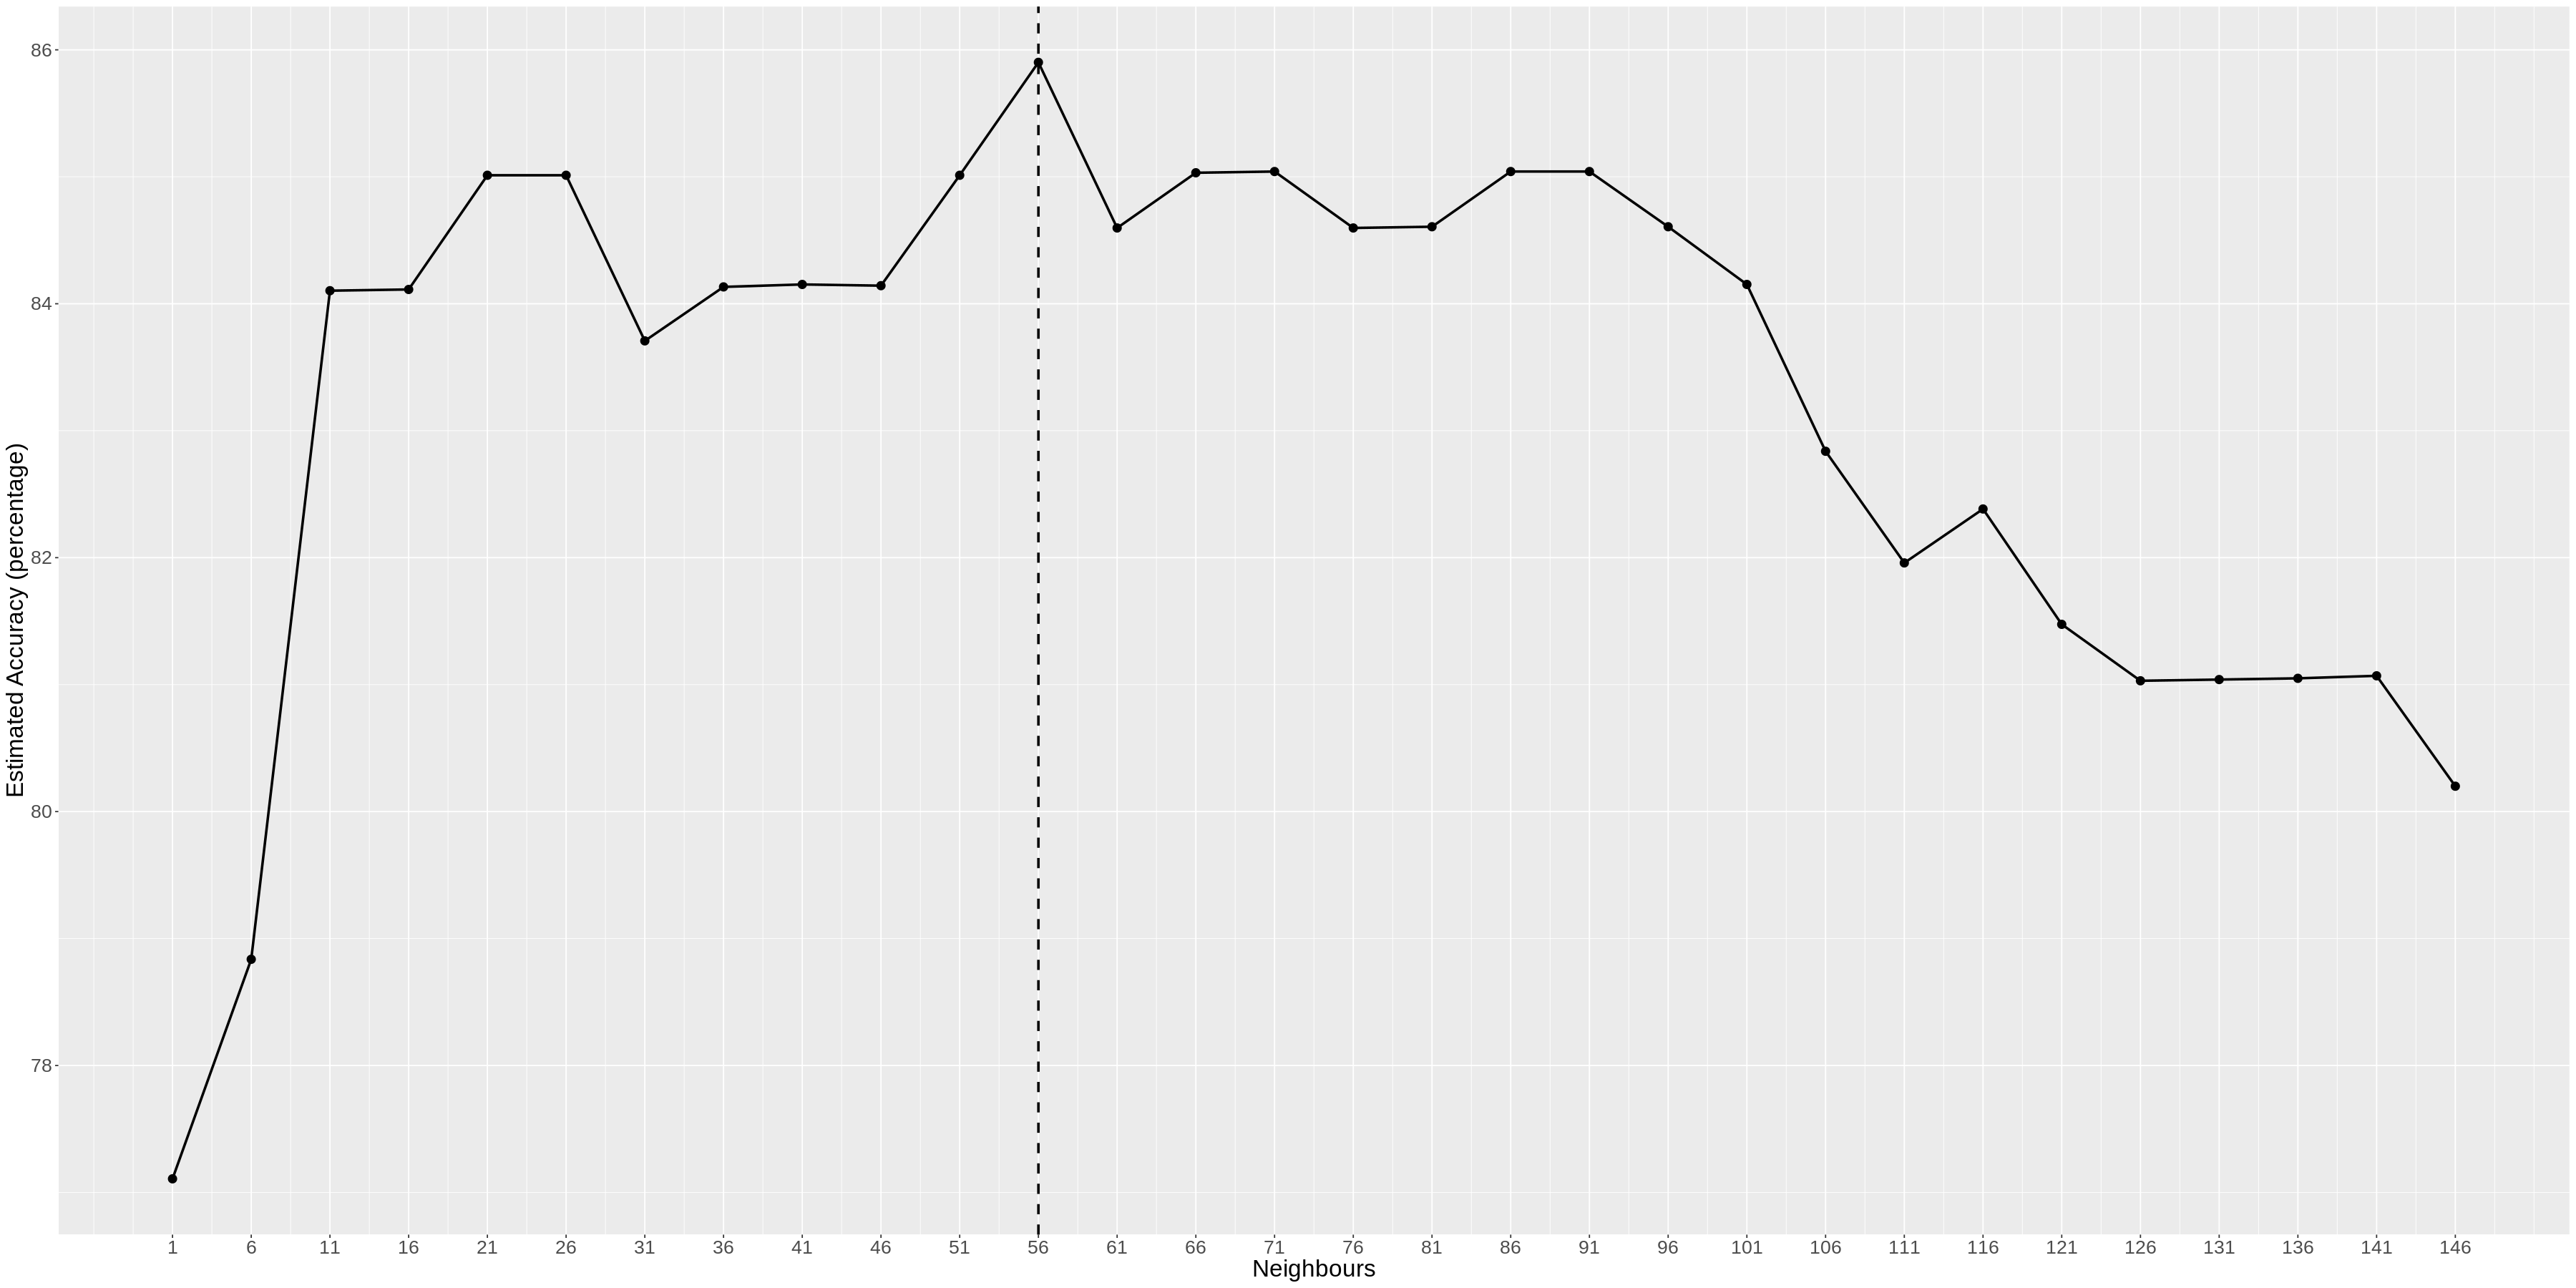

In [ ]:
head(results, 6)
tail(results, 6) 

highest_accuracy <- results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors, mean)
highest_accuracy
cross_val_plot <- ggplot(results, aes(x = neighbors, y = 100 * mean)) +
                          geom_point(size = 3) +
                          geom_line(size = 1) +
                          labs(x = "Neighbours", y = "Estimated Accuracy (percentage)") +
                          theme(text = element_text(size = 20)) +
                          scale_x_continuous(breaks = seq(1, 150, by = 5)) +
                          geom_vline(xintercept = 56, linetype = "dashed", size = 1)
cross_val_plot

In [ ]:
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = highest_accuracy) |>
      set_engine("kknn") |>
      set_mode("classification")

final_fit <- workflow() |>
      add_recipe(myRecipe) |>
      add_model(final_spec) |>
      fit(data = training_data)

final_predictions <- predict(final_fit , testing_data) |>
    bind_cols(testing_data)
final_metrics <- final_predictions |>
    metrics(truth = Heart_Disease_Diagnosis, estimate = .pred_class) |>
    filter(.metric == "accuracy")
final_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8552632


In [155]:

heart_confusion <- final_predictions |>
                    conf_mat(truth = Heart_Disease_Diagnosis, estimate = .pred_class) 

groups <- c('True Negative', 'False Negative', 'False Positive', 'True Positive')

heart_confusion_df <- as.data.frame(heart_confusion$table) |>
                   cbind(groups)

heart_confusion

          Truth
Prediction  0  1
         0 39  9
         1  2 26

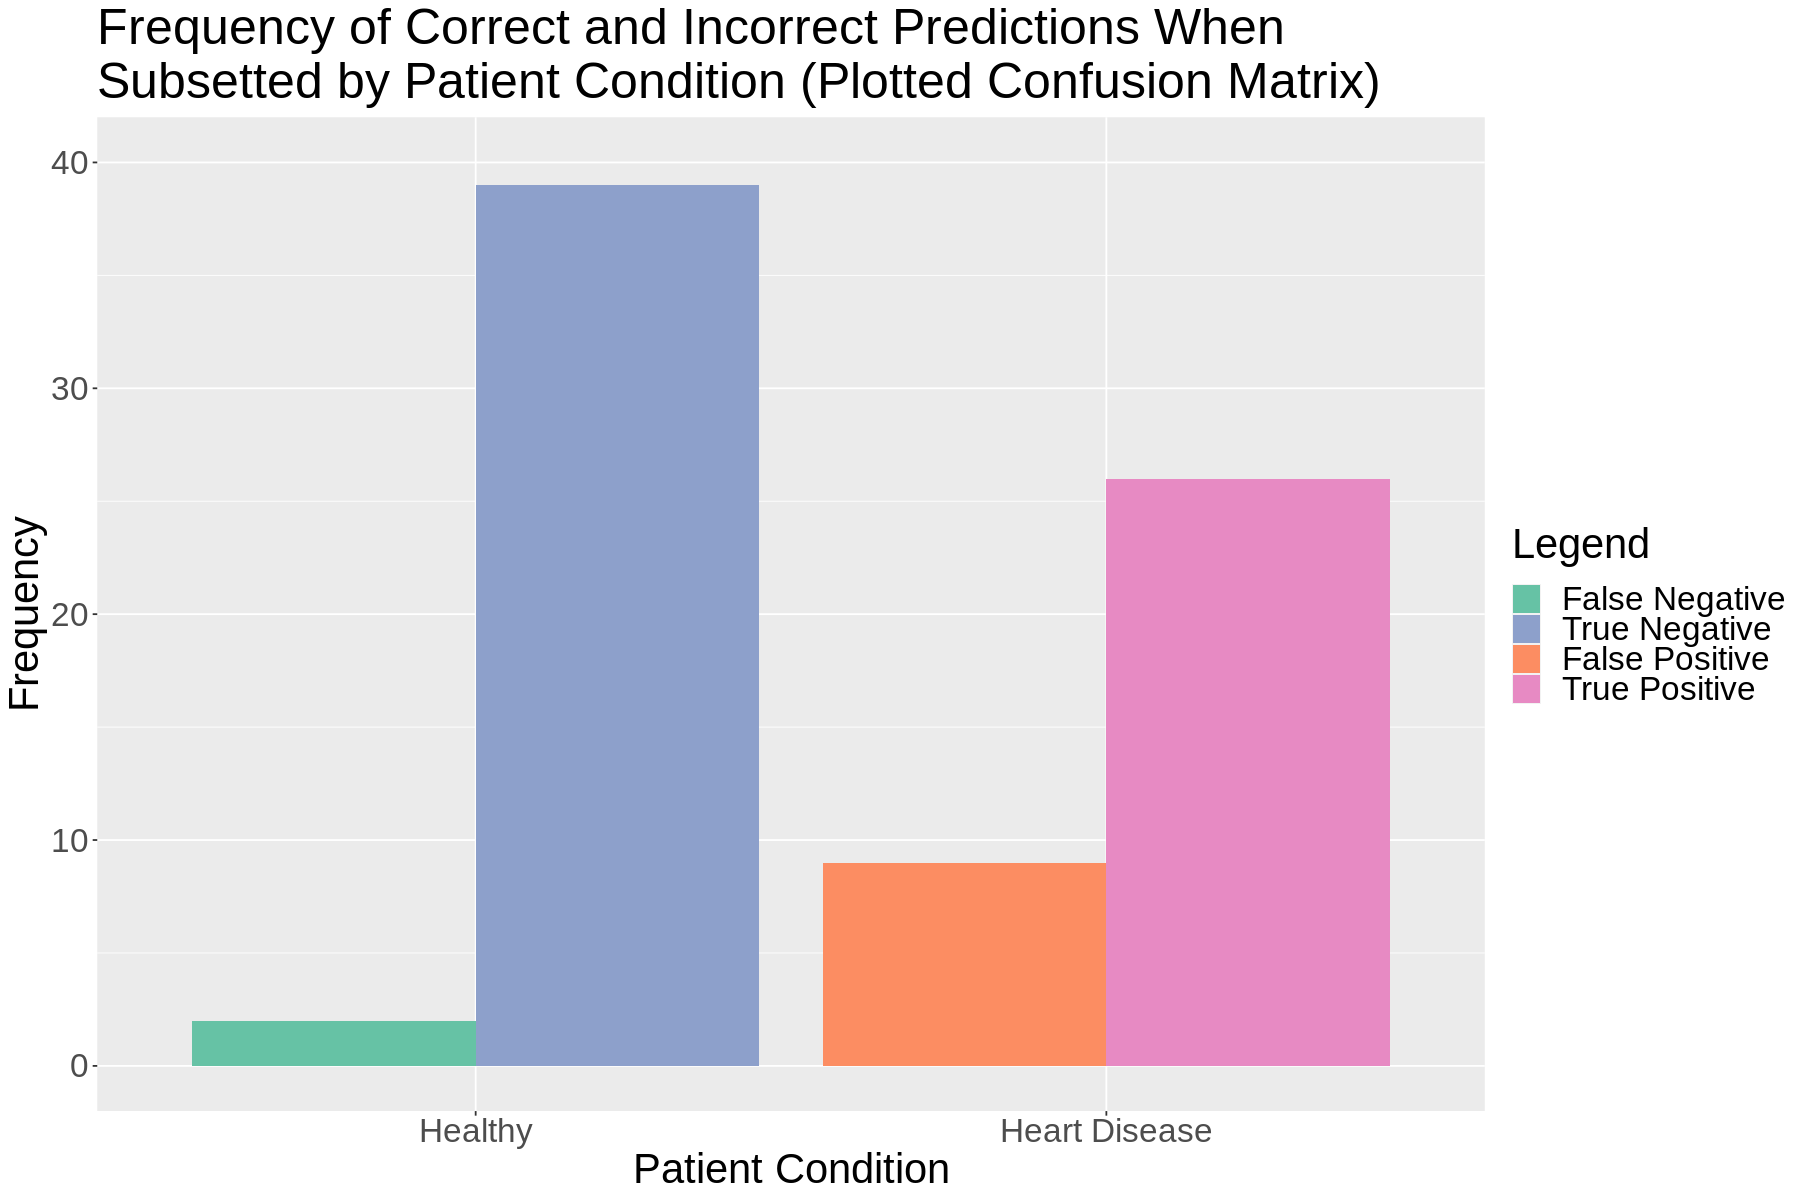

In [156]:
options(repr.plot.width=15, repr.plot.height=10)

conf_plot <- ggplot(heart_confusion_df, aes(x = as.factor(Truth), y = Freq, fill = groups)) +
             geom_bar(stat = 'identity', position = 'dodge') +
             labs(x = 'Patient Condition', y = 'Frequency', fill = 'Legend') +
             scale_x_discrete(labels = c('Healthy', 'Heart Disease')) +
             ggtitle('Frequency of Correct and Incorrect Predictions When \nSubsetted by Patient Condition (Plotted Confusion Matrix)') +
             scale_y_continuous(limits=c(0, 40)) +
             theme(text = element_text(size = 25)) +
             scale_fill_brewer(palette = "Set2", breaks = c('False Negative', 'True Negative', 'False Positive', 'True Positive'))

conf_plot

### Methods:
We will be conducting predictor variable selection using all 13 variables in our dataset to determine their relevance in predicting heart disease diagnosis. To confirm our choice of variables, we will examine the bar chart visualization (percentage of people with heart disease against predictor variable). Continuous variables and categorical variables were visualized with different y-axis to help us visualize trends better. Then, we will use those subsetted variables to predict if a patient has heart disease using K-nearest neighbor classification tuned using a 5-fold cross-validation. 
For our visualization, we plan on plotting the estimated average accuracy of the classifier versus the K values that we used in our cross-validation. This visualization is relevant because it will help us choose a K value that maximizes accuracy, which is important as we want our model to make a prediction that is as accurate as possible.

### Expected outcomes and significance:
We expect to find that some of the variables are indicators of heart disease. Such findings can help inform doctors and patients of warning signs that they may be developing or having heart disease. They can also help doctors target specific heart disease factors for treatment such as lowering blood sugar or cholesterol levels, for example. This could lead to some future questions:
What other factors can lead to heart disease?
Which factor has the greatest effect on heart disease diagnosis?
